In [2]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

## Variable Descriptions
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track (are we sure we are getting the right data variables. popularity can be for artist, album, track ....

**id**: (string) The Spotify ID for the track.

**title**: (string) The name of the song for the track. 

**all_artists**: (string) The name of the artists for the song.

**popularity**: (int) Popularity is measured on a scale from 0-100 of how popular the song is. "[P]opularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past"

**release_date**: (string) The date on which the track was released for listening on Spotify, represented in yyyy-mm-dd format.

**danceability**: (float) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: (float) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**: (int) The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1, <= 11

**loudness**: (float) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**: (int) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**acousticness**: (float) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1

**instrumentalness**: (float) Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**: (float) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**: (float) A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

**tempo**: (float) The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**: (int) The duration of the track in milliseconds.

**time_signature**: (int) An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7


In [3]:
#load in data
data = pd.read_csv("TikTok_Playlist.csv")
data

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5reQI13tWWYDLMrGcUF4Mk,Nuestra Canción,Vicente Garcia,83,2015-06-16,0.906,0.731,6,-7.021,0,0.42600,0.000005,0.0853,0.794,106.995,260080,4
1,6M47gaKejso9772SKTa3yH,Face Off,Dwayne Johnson,81,2021-10-08,0.693,0.935,8,-4.323,1,0.18000,0.000000,0.1790,0.391,80.882,219802,4
2,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,Tom Rosenthal,78,2018-10-26,0.440,0.040,3,-16.887,1,0.98100,0.465000,0.1110,0.249,135.965,193749,4
3,15HMh4yxdf4wyxSZSlOgGZ,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,Moliy,88,2021-09-16,0.859,0.525,1,-8.051,0,0.43400,0.000023,0.1080,0.312,110.066,204764,4
4,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Adele,100,2021-10-14,0.604,0.366,5,-7.519,1,0.57800,0.000000,0.1330,0.130,141.981,224695,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0ecC8p17cDNlxHXkuYqeR6,Surrender,Natalie Taylor,76,2019-10-29,0.390,0.448,5,-8.570,0,0.80000,0.182000,0.1070,0.077,144.890,183103,5
201,6otiaV2fagE3s8IvP6WkwG,I'm Just a Kid,Simple Plan,73,2018-04-06,0.527,0.834,1,-5.531,1,0.00107,0.000102,0.0993,0.422,110.065,198333,4
202,6vFsBXYczYsP0H3lgunZOm,Cloud 9,Beach Bunny,80,2020-02-14,0.637,0.929,4,-3.593,1,0.00167,0.000026,0.3440,0.902,80.974,147351,4
203,11ZulcYY4lowvcQm4oe3VJ,Slumber Party (feat. Princess Nokia),Princess Nokia,79,2021-01-15,0.964,0.398,11,-8.981,0,0.00151,0.000040,0.1010,0.563,105.012,178405,4


In [5]:
#view overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                205 non-null    object 
 1   title             205 non-null    object 
 2   all_artists       205 non-null    object 
 3   popularity        205 non-null    int64  
 4   release_date      205 non-null    object 
 5   danceability      205 non-null    float64
 6   energy            205 non-null    float64
 7   key               205 non-null    int64  
 8   loudness          205 non-null    float64
 9   mode              205 non-null    int64  
 10  acousticness      205 non-null    float64
 11  instrumentalness  205 non-null    float64
 12  liveness          205 non-null    float64
 13  valence           205 non-null    float64
 14  tempo             205 non-null    float64
 15  duration_ms       205 non-null    int64  
 16  time_signature    205 non-null    int64  
dt

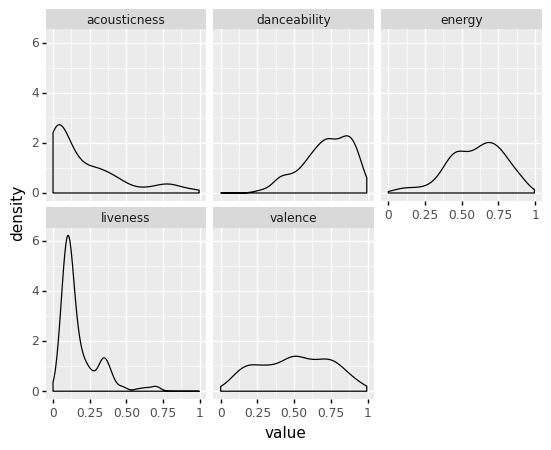

<ggplot: (8793229954344)>

In [7]:
quant01 = ['danceability', 'energy', 
    'acousticness', 'liveness',
       'valence']
facetdf01 = pd.melt(data, id_vars=['id'], value_vars=quant01)
gg = p9.ggplot(facetdf01, p9.aes(x='value'))
gg += p9.geom_density()
gg += p9.facet_wrap('~variable')
gg

In [4]:
quantitative = ['popularity','danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
facetdf = pd.melt(data, id_vars=['id'], value_vars=quantitative)

In [11]:
facetdf.isna().sum()

id          0
variable    0
value       0
dtype: int64

In [18]:
facetdf

,id,variable,value
0,5reQI13tWWYDLMrGcUF4Mk,popularity,83.0
1,6M47gaKejso9772SKTa3yH,popularity,81.0
2,4IhTXiZLKATmwhMZIb1GQN,popularity,78.0
3,15HMh4yxdf4wyxSZSlOgGZ,popularity,88.0
4,0gplL1WMoJ6iYaPgMCL0gX,popularity,100.0
...,...,...,...
2660,0ecC8p17cDNlxHXkuYqeR6,time_signature,5.0
2661,6otiaV2fagE3s8IvP6WkwG,time_signature,4.0
2662,6vFsBXYczYsP0H3lgunZOm,time_signature,4.0
2663,11ZulcYY4lowvcQm4oe3VJ,time_signature,4.0


In [48]:
facetdf.value 

0        83.0
1        81.0
2        78.0
3        88.0
4       100.0
        ...  
2660      5.0
2661      4.0
2662      4.0
2663      4.0
2664      4.0
Name: value, Length: 2665, dtype: float64

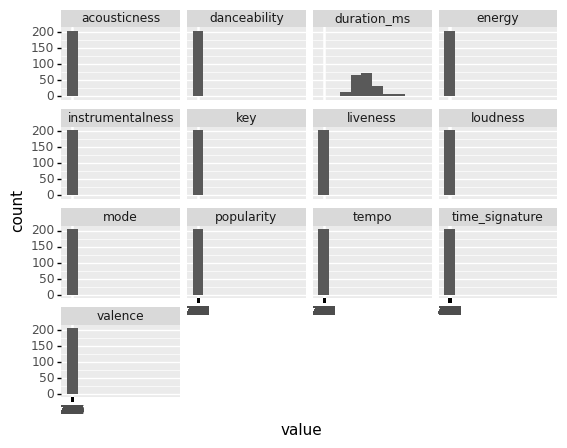

<ggplot: (-9223371890565062576)>

In [52]:
#not working
gg = p9.ggplot(facetdf, p9.aes(x='value'))
gg += p9.geom_histogram(bins = 10)
gg += p9.facet_wrap('~variable')
gg += p9.scale_x_continuous(breaks=range(0, 500), minor_breaks=[])
gg

In [26]:
data.popularity

0       83
1       81
2       78
3       88
4      100
      ... 
200     76
201     73
202     80
203     79
204     81
Name: popularity, Length: 205, dtype: int64

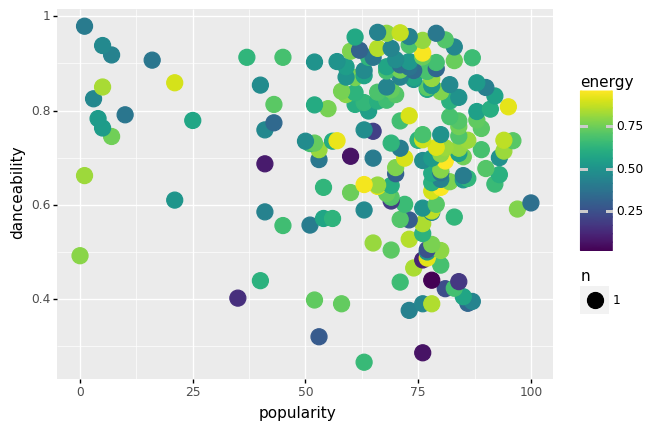

<ggplot: (-9223371890569515460)>

In [81]:
'''
Plot danceability against popularity by color energy,
we can see that high energy tracks are both danceable and more popular. 
Generally high popularity of songs indicates high value of danceability on Tiktok
'''
plot1 = p9.ggplot(data, p9.aes(x='popularity', y = "danceability", color = "energy") )
plot1 += p9.geom_count()
plot1

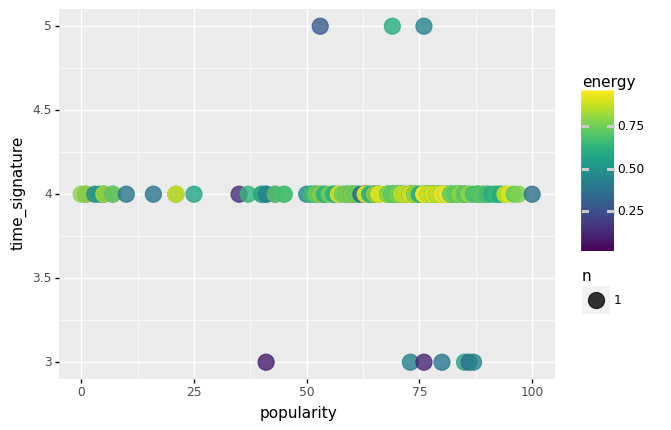

<ggplot: (-9223371890557792352)>

In [86]:
'''
Plot time signature against popularity by color energy,
we can see that high energy tracks are likely to have 4 beats in each bar and more popular,
and low energy tracks are only popular when they have 3 beats per bar or 5 beats per bar.
Generally high popularity of songs indicates 4 beats per bar with high energy on Tiktok.
'''
plot2 = p9.ggplot(data, p9.aes(x='popularity', y = "time_signature", color = "energy") )
plot2 += p9.geom_count(alpha = 0.8)
plot2

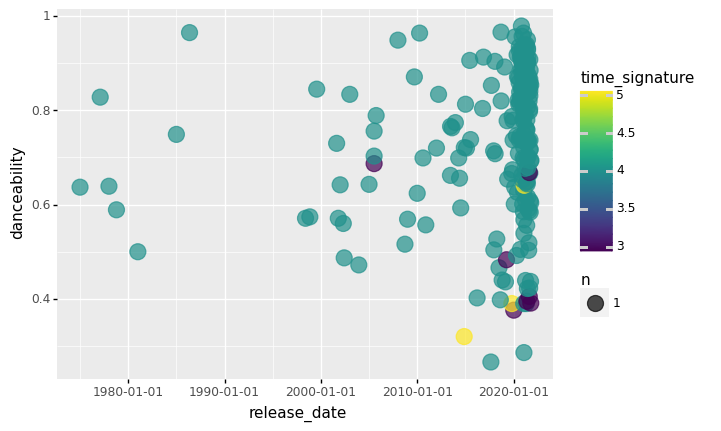

<ggplot: (-9223371890557685944)>

In [101]:
'''
Plot danceability against release date by color time signature,
we can clearly see that most TikTok songs are very new, released within one year of being popular on TikTok. 
The danceability value is across the spectrum for recent TikTok songs, but older songs are overall in the
higher range of danceability, which is likely why users picked out the song in the first place. 
Again it is visible that most data points is 4 beats per bar, but less danceable songs have 3/5 beats per bar
and that they are recent, so the novelty is likely valued more for those songs by TikTok users than time signature.
'''
plot3 = p9.ggplot(data, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot3 += p9.geom_count(alpha = 0.7)
plot3

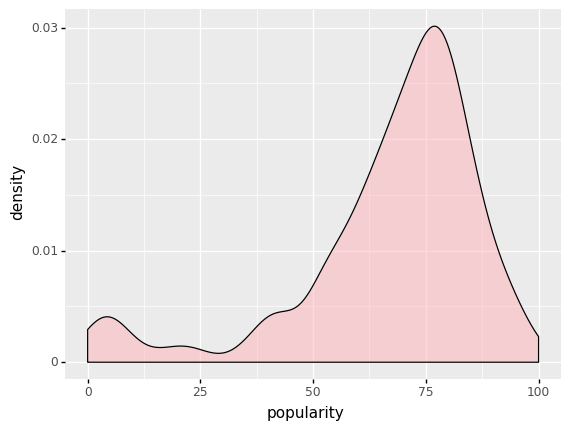

<ggplot: (-9223371890558259704)>

In [59]:
gg = p9.ggplot(data, p9.aes(x='popularity'))
gg += p9.geom_density(fill = "#ffb3ba", alpha = 0.5)
gg

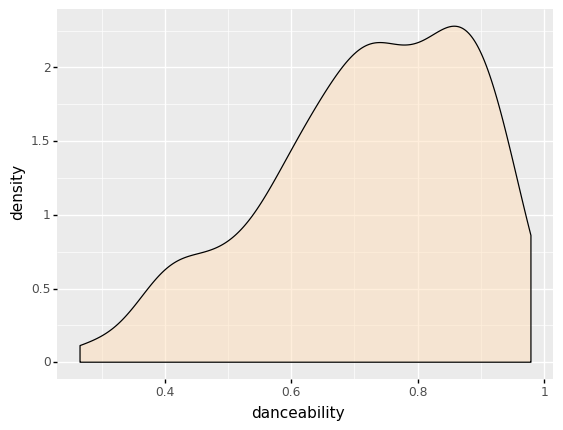

<ggplot: (-9223371890558136228)>

In [60]:
gg = p9.ggplot(data, p9.aes(x='danceability'))
gg += p9.geom_density(fill = "#ffdfba", alpha = 0.5)
gg

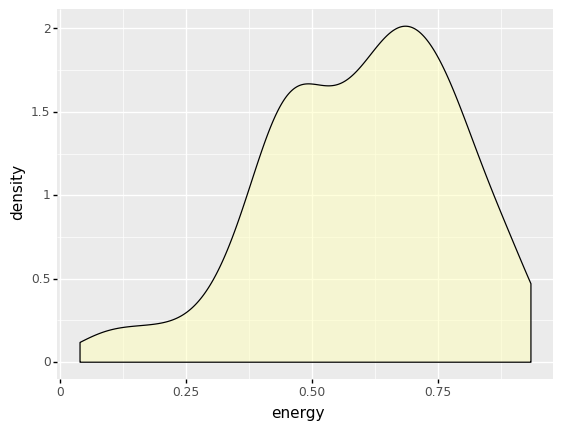

<ggplot: (-9223371890558090220)>

In [61]:
gg = p9.ggplot(data, p9.aes(x='energy'))
gg += p9.geom_density(fill = "#ffffba", alpha = 0.5)
gg

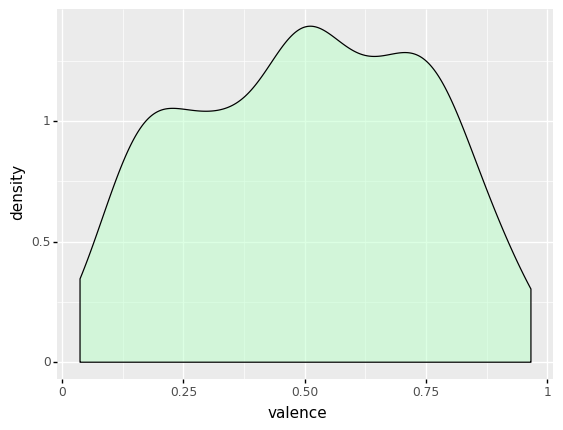

<ggplot: (-9223371890557966596)>

In [62]:
gg = p9.ggplot(data, p9.aes(x='valence'))
gg += p9.geom_density(fill = "#baffc9", alpha = 0.5)
gg

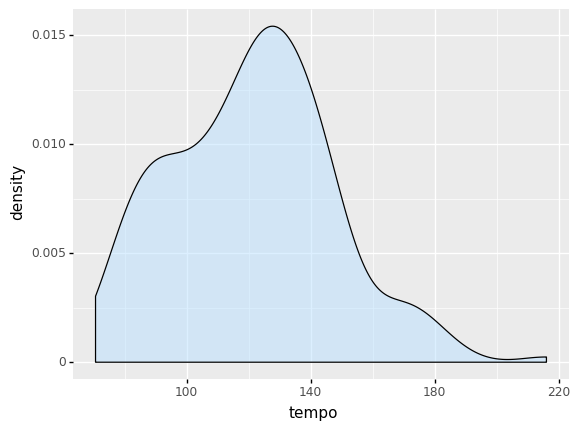

<ggplot: (-9223371890557963028)>

In [63]:
gg = p9.ggplot(data, p9.aes(x='tempo'))
gg += p9.geom_density(fill = "#bae1ff", alpha = 0.5)
gg

In [68]:
data.release_date = pd.to_datetime(data.release_date)

In [75]:
gg = p9.ggplot(data)
gg += p9.facet_wrap('~system') 
gg += p9.geom_density(mapping=p9.aes(x='voter_density',y='swing'))